# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Dzakyudin Fathu Rohman]
- **Email:** [dz4kyudinfathurohman@gmail.com]
- **ID Dicoding:** [dzaky_i6LK]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola pembelian pelanggan setiap bulannya?
- Apa produk yang memiliki jumlah penjualan dan total pendapatan tertinggi?
- RFM Analysis:
    - Daftar pelanggan yang baru melakukan pembelian?
    - Daftar pelanggan dengan jumlah barang yang dibeli paling banyak?   
    - Daftar pelanggan dengan nominal yang dibelanjakan paling banyak?
- Bagaimana distribusi pembelian:
    - Kota dengan pembelian terbanyak?
    - Negara dengan pembelian terbanyak?
    - Urutan jenis payment yang paling banyak digunakan?
    - Distribusi kategori berdasarkan jenis payment?
- Bagaimana persebaran Geospatial Anlysis?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv("data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Dataset terdiri dari 9 tabel
- Sebagian besar tabel memiliki id yang dapat terhubung satu sama lain

### Assessing Data

#### Menilai data customers_df

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai data geolocation_df

In [14]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [15]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [16]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Menilai data order_items_df

In [17]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [19]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai data order_payments_df

In [20]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [21]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [22]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai data order_reviews_df

In [23]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [24]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [25]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai data orders_df

In [26]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [27]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [28]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai data product_category_df

In [29]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [30]:
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [31]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())

product_category_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Menilai data products_df

In [32]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [33]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [34]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai data sellers_df

In [35]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [36]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [37]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- xxx
- xxx

### Cleaning Data

#### Membersihkan tabel geolocation_df

##### Duplicated data

In [38]:
geolocation_df.duplicated().sum()

np.int64(261831)

In [39]:
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


##### Outlier

In [40]:
# Menghitung outlier dengan IQR
Q1 = geolocation_df['geolocation_lat'].quantile(0.25)
Q3 = geolocation_df['geolocation_lat'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyimpan DataFrame tanpa outlier
geolocation_df = geolocation_df[(geolocation_df['geolocation_lat'] >= lower_bound) & (geolocation_df['geolocation_lat'] <= upper_bound)]

# Menampilkan jumlah baris setelah menghapus outlier
print(f'Jumlah data setelah menghapus outlier: {geolocation_df.shape[0]}')

Jumlah data setelah menghapus outlier: 608046


In [41]:
# Menghitung outlier dengan IQR
Q1 = geolocation_df['geolocation_lng'].quantile(0.25)
Q3 = geolocation_df['geolocation_lng'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyimpan DataFrame tanpa outlier
geolocation_df = geolocation_df[(geolocation_df['geolocation_lng'] >= lower_bound) & (geolocation_df['geolocation_lng'] <= upper_bound)]

In [42]:
print(geolocation_df.shape)

(602237, 5)


##### Membuat fungsi aggregrasi geolocation_zip_code_prefix untuk meringkas jumlah data

In [43]:
from scipy import stats

# Fungsi untuk menghitung modus
def get_mode(series):
    return series.mode().iloc[0] 

geolocation_df = geolocation_df.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean',      
    'geolocation_lng': 'mean',        
    'geolocation_city': get_mode,      
    'geolocation_state': get_mode      
}).reset_index()

# Menampilkan DataFrame yang sudah teragregasi
print(geolocation_df.shape)

(13612, 5)


#### Membersihkan tabel order_items_df

##### Outlier

In [44]:
# Menghitung outlier dengan IQR
Q1 = order_items_df['price'].quantile(0.25)
Q3 = order_items_df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = order_items_df[(order_items_df['price'] < lower_bound) | (order_items_df['price'] > upper_bound)]

print(f'Jumlah outlier pada kolom price: {outliers.shape[0]}')

# Mengganti outlier dengan nilai batas atas dan bawah
order_items_df['price'] = order_items_df['price'].clip(lower=lower_bound, upper=upper_bound)

Jumlah outlier pada kolom price: 8427


In [45]:
# Menghitung outlier dengan IQR
Q1 = order_items_df['freight_value'].quantile(0.25)
Q3 = order_items_df['freight_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = order_items_df[(order_items_df['freight_value'] < lower_bound) | (order_items_df['freight_value'] > upper_bound)]

print(f'Jumlah outlier pada kolom freight_value: {outliers.shape[0]}')

# Mengganti outlier dengan nilai batas atas dan bawah
order_items_df['freight_value'] = order_items_df['freight_value'].clip(lower=lower_bound, upper=upper_bound)

Jumlah outlier pada kolom freight_value: 12134


#### Membersihkan tabel order_payments_df

##### Outlier

In [ ]:
# Menghitung outlier dengan IQR
Q1 = order_payments_df['payment_value'].quantile(0.25)
Q3 = order_payments_df['payment_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = order_payments_df[(order_payments_df['payment_value'] < lower_bound) | (order_payments_df['payment_value'] > upper_bound)]

print(f'Jumlah outlier pada kolom payment_value: {outliers.shape[0]}')

# Mengganti outlier dengan nilai batas atas dan bawah
order_payments_df['payment_value'] = order_payments_df['payment_value'].clip(lower=lower_bound, upper=upper_bound)

Jumlah outlier pada kolom payment_value: 7981


#### Membersihkan tabel order_reviews_df

##### Missing values

In [47]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [48]:
# Mengisi missing value dengan string kosong atau placeholder
order_reviews_df['review_comment_title'].fillna('No Title', inplace=True)
order_reviews_df['review_comment_message'].fillna('No Comment', inplace=True)


C:\Users\ACER NITRO 5\AppData\Local\Temp\ipykernel_8100\912833083.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df['review_comment_title'].fillna('No Title', inplace=True)
C:\Users\ACER NITRO 5\AppData\Local\Temp\ipykernel_8100\912833083.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

#### Membersihkan tabel orders_df

##### Data type

In [49]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], errors='coerce')
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'], errors='coerce')
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'], errors='coerce')
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'], errors='coerce')
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'], errors='coerce')

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


##### Missing value

In [51]:
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

In [52]:
status = ["delivered", "shipped", "canceled", "unavailable", "invoiced", "processing", "created", "approved"]
for i in status:
    shipped_orders = orders_df[orders_df["order_status"] == i]
    missing_values = shipped_orders.isnull().sum()
    missing_columns = missing_values[missing_values > 0]
    print(f"Missing value pada status {i}:")
    print(missing_columns)

Missing value pada status delivered:
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
dtype: int64
Missing value pada status shipped:
order_delivered_customer_date    1107
dtype: int64
Missing value pada status canceled:
order_approved_at                141
order_delivered_carrier_date     550
order_delivered_customer_date    619
dtype: int64
Missing value pada status unavailable:
order_delivered_carrier_date     609
order_delivered_customer_date    609
dtype: int64
Missing value pada status invoiced:
order_delivered_carrier_date     314
order_delivered_customer_date    314
dtype: int64
Missing value pada status processing:
order_delivered_carrier_date     301
order_delivered_customer_date    301
dtype: int64
Missing value pada status created:
order_approved_at                5
order_delivered_carrier_date     5
order_delivered_customer_date    5
dtype: int64
Missing value pada status approved:
order_delivered_carrier_date     

In [53]:
# menghapus missing value status 'delivered'
orders_df = orders_df[~((orders_df['order_status'] == 'delivered') & (orders_df.isnull().any(axis=1)))]

# mengisi missing dengan selisih rata-rata antara delivered dan purchase dalam hari untuk status 'shipped'
orders_df['delivery_days'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days
mean_delivery_days = orders_df['delivery_days'].mean()
orders_df.loc[
    (orders_df['order_status'] == 'shipped') & (orders_df['order_delivered_customer_date'].isnull()),
    'order_delivered_customer_date'
] = orders_df['order_purchase_timestamp'] + pd.to_timedelta(mean_delivery_days, unit='days')
orders_df.drop(columns=['delivery_days'], inplace=True)


# menandai sebagai 'canceled' dan 'not approved' untuk status 'canceled' dan 'unavailable'
orders_df.loc[orders_df['order_status'] == 'canceled', ['order_delivered_customer_date', 'order_delivered_carrier_date']] = 'canceled'
orders_df.loc[orders_df['order_status'] == 'canceled', 'order_approved_at'] = orders_df['order_approved_at'].fillna('not_approved')

# menandai sebagai 'unavailable' untuk status 'unavailable'
orders_df.loc[orders_df['order_status'] == 'unavailable', ['order_delivered_customer_date', 'order_delivered_carrier_date']] = 'unavailable'

# mengisi dengan 'pending' untuk status 'invoiced', 'processing', 'created', 'approved',
orders_df.loc[orders_df['order_status'].isin(['invoiced', 'processing', 'created', 'approved']), ['order_delivered_customer_date', 'order_delivered_carrier_date']] = 'pending'

# menghapus missing value jika masih terdapat missing value
orders_df = orders_df.dropna()


C:\Users\ACER NITRO 5\AppData\Local\Temp\ipykernel_8100\344692837.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'canceled' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  orders_df.loc[orders_df['order_status'] == 'canceled', ['order_delivered_customer_date', 'order_delivered_carrier_date']] = 'canceled'
C:\Users\ACER NITRO 5\AppData\Local\Temp\ipykernel_8100\344692837.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'canceled' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  orders_df.loc[orders_df['order_status'] == 'canceled', ['order_delivered_customer_date', 'order_delivered_carrier_date']] = 'canceled'
C:\Users\ACER NITRO 5\AppData\Local\Temp\ipykernel_8100\344692837.py:16: FutureWarning: Setting an item of inc

In [54]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [55]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99413 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99413 non-null  object        
 1   customer_id                    99413 non-null  object        
 2   order_status                   99413 non-null  object        
 3   order_purchase_timestamp       99413 non-null  datetime64[ns]
 4   order_approved_at              99413 non-null  object        
 5   order_delivered_carrier_date   99413 non-null  object        
 6   order_delivered_customer_date  99413 non-null  object        
 7   order_estimated_delivery_date  99413 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(6)
memory usage: 6.8+ MB


#### Membersihkan tabel products_df

##### Missing value

In [56]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [57]:
# Mengisi missing value pada kolom numerik dengan mean
products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].mean(), inplace=True)
products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].mean(), inplace=True)
products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].mean(), inplace=True)
products_df['product_weight_g'].fillna(products_df['product_weight_g'].mean(), inplace=True)
products_df['product_length_cm'].fillna(products_df['product_length_cm'].mean(), inplace=True)
products_df['product_height_cm'].fillna(products_df['product_height_cm'].mean(), inplace=True)
products_df['product_width_cm'].fillna(products_df['product_width_cm'].mean(), inplace=True)

# Mengisi missing value pada kolom kategorikal dengan mode
products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0], inplace=True)

C:\Users\ACER NITRO 5\AppData\Local\Temp\ipykernel_8100\2622903364.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].mean(), inplace=True)
C:\Users\ACER NITRO 5\AppData\Local\Temp\ipykernel_8100\2622903364.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

In [58]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


#### **Insight:**
- Pada tabel `orders_df` memiliki missing value pada tanggal-tanggal status pengiriman, disini data yang missing value tidak dihapus semuanya melainkan dilabeli dengan penanda berupa 'string' agar informasi berbagai macam status pengiriman tetap terjaga
- Pada tabel `orders_df` kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date tipe data berupa object karena terdapat label penanda

## Exploratory Data Analysis (EDA)

### Explore `customers_df`

In [59]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
55223,11370ea4b3f9179755b40b090ff69cc2,2f3f6dccce404d1c38be34db1fe4c34e,5663,sao paulo,SP
35669,04802886a43fe74bd00496abf197b3a6,971c2c9f771f31f9e88687edf04f37c1,8773,mogi das cruzes,SP
37986,75c8873878785af64664ea575dc50c52,7e53420f2126366b3489c18314f82803,38414,uberlandia,MG
87956,b0611a1d4bd46ccceae275caf19d304c,30cd812ff21054f5e7a1383dc70de5d8,66087,belem,PA
8585,b4b7b6904f73bb50942b2af1abec52a8,30e15d76053e5304e98b97888ff0bcbd,92310,canoas,RS


In [ ]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [ ]:
city_state_unique_customers = customers_df.groupby(['customer_city', 'customer_state']).customer_id.nunique()
city_state_unique_customers_sorted = city_state_unique_customers.sort_values(ascending=False)
print(city_state_unique_customers_sorted.head(10)) 

customer_city          customer_state
sao paulo              SP                15540
rio de janeiro         RJ                 6882
belo horizonte         MG                 2773
brasilia               DF                 2131
curitiba               PR                 1521
campinas               SP                 1444
porto alegre           RS                 1379
salvador               BA                 1245
guarulhos              SP                 1189
sao bernardo do campo  SP                  938
Name: customer_id, dtype: int64


### Explore `geolocation_df`

In [62]:
geolocation_df.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1001,-23.550227,-46.634039,sao paulo,SP
1,1002,-23.547657,-46.634991,sao paulo,SP
2,1003,-23.549000,-46.635582,sao paulo,SP
3,1004,-23.549829,-46.634792,sao paulo,SP
4,1005,-23.549547,-46.636406,sao paulo,SP


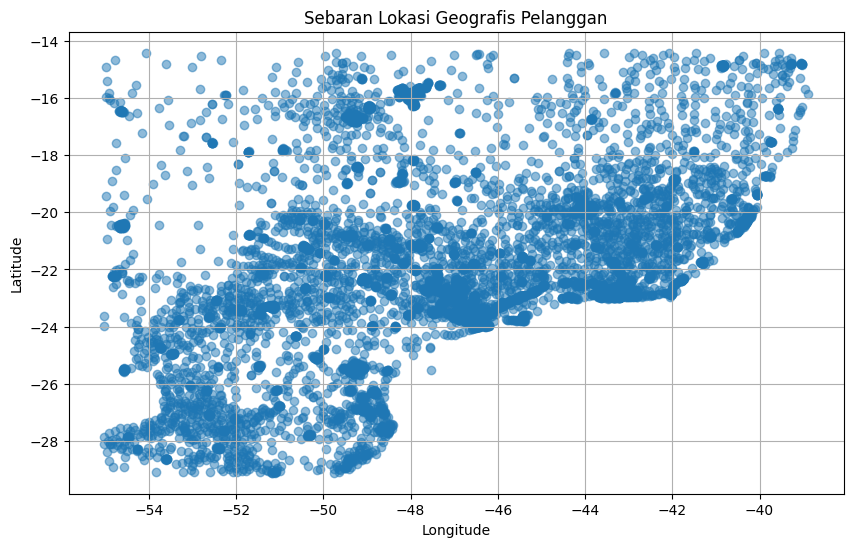

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(geolocation_df['geolocation_lng'], geolocation_df['geolocation_lat'], alpha=0.5)
plt.title('Sebaran Lokasi Geografis Pelanggan')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


### Explore `sellers_df`

In [64]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2216,be8e909810184b9b19e886129149d8e5,13418,piracicaba,SP
1194,d9e8c084b68fe958861d8f2c21202e6b,5528,sao paulo,SP
1036,80146bc52c4f6af5239b23de2a20262b,6753,taboao da serra,SP
1956,83c8aafbefb034674a70de0eac5b8954,85601,francisco beltrao,PR
2739,50a7e551a7b3f8d37cd6e32d8bfbe5ea,9520,sao caetano do sul,SP


In [65]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo                 694
curitiba                  127
rio de janeiro             96
belo horizonte             68
ribeirao preto             52
                         ... 
aguas claras df             1
ao bernardo do campo        1
angra dos reis rj           1
vitoria de santo antao      1
vicente de carvalho         1
Name: seller_id, Length: 611, dtype: int64

### Explore `customers_df`, `geolocation_df`, dan `sellers_df`

In [66]:
customers_df = customers_df.merge(geolocation_df,
                                    left_on="customer_zip_code_prefix",
                                    right_on="geolocation_zip_code_prefix",
                                    how='inner')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.499273,-47.396658,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,-23.728396,-46.542250,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,-23.531309,-46.656690,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775,-23.500670,-46.186348,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056,-22.975708,-47.143140,campinas,SP


In [67]:
customers_seller_df = customers_df.merge(sellers_df,
                                    left_on="customer_zip_code_prefix",
                                    right_on="seller_zip_code_prefix",
                                    how='left')
customers_seller_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.499273,-47.396658,franca,SP,NaN,NaN,NaN,NaN
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,-23.728396,-46.542250,sao bernardo do campo,SP,NaN,NaN,NaN,NaN
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,-23.531309,-46.656690,sao paulo,SP,NaN,NaN,NaN,NaN
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775,-23.500670,-46.186348,mogi das cruzes,SP,NaN,NaN,NaN,NaN
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056,-22.975708,-47.143140,campinas,SP,8d46553a36e68f95350a200c12f8f2e2,13056.0,campinas,SP


In [68]:
print("Jumlah duplikasi: ", customers_seller_df.duplicated().sum())

Jumlah duplikasi:  0


In [69]:
# Menghapus kolom seller_zip_code_prefix
customers_seller_df = customers_seller_df.drop(columns=['seller_zip_code_prefix'])

# Missing value
# 1. Mengisi seller_id dengan "none"
customers_seller_df['seller_id'] = customers_seller_df['seller_id'].fillna('none')

# 2. Mengisi seller_city sama dengan customer_city
customers_seller_df['seller_city'] = customers_seller_df['seller_city'].fillna(customers_seller_df['customer_city'])

# 3. Mengisi seller_state sama dengan customer_state
customers_seller_df['seller_state'] = customers_seller_df['seller_state'].fillna(customers_seller_df['customer_state'])

In [70]:
customers_seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99774 entries, 0 to 99773
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  99774 non-null  object 
 1   customer_unique_id           99774 non-null  object 
 2   customer_zip_code_prefix     99774 non-null  int64  
 3   customer_city                99774 non-null  object 
 4   customer_state               99774 non-null  object 
 5   geolocation_zip_code_prefix  99774 non-null  int64  
 6   geolocation_lat              99774 non-null  float64
 7   geolocation_lng              99774 non-null  float64
 8   geolocation_city             99774 non-null  object 
 9   geolocation_state            99774 non-null  object 
 10  seller_id                    99774 non-null  object 
 11  seller_city                  99774 non-null  object 
 12  seller_state                 99774 non-null  object 
dtypes: float64(2), i

### Explore `order_items_df` dan `order_payments_df`

In [71]:
order_items_df.sample(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
53677,7a19a03fa5f748e858559ddde2408f4d,3,b532349fe46b38fbc7bb3914c1bdae07,1025f0e2d44d7041d6cf58b6550e0bfa,2017-09-14 13:30:13,38.4,26.89
21988,323bbdc2ccee2a7f26f2a66fca94e58b,1,aaa391b7c35a628a6318851e8e933e0b,e5a3438891c0bfdb9394643f95273d8e,2017-10-10 03:04:04,20.3,8.11
53792,7a4fa3c26b5a8846a34da9564571212c,4,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-28 09:15:28,53.9,14.47


In [72]:
order_payments_df.sample(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
63749,d6e8839199c7ca3b2d7aede27fb9659a,1,credit_card,2,99.47
89894,88138c1ad58f2e3eb654cfc1ba222742,1,boleto,1,267.78
96850,de3574da763e9c4950cfc27933332396,1,credit_card,1,75.14


In [73]:
items_payments_df = order_items_df.merge(order_payments_df,
                                    left_on="order_id",
                                    right_on="order_id",
                                    how='inner')
items_payments_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,218.04


In [74]:
items_payments_df.groupby(by="payment_type").agg({
    "product_id": "nunique",
    "freight_value": "sum",
    "price": ["min", "max", "mean"]
})

product_id freight_value price                   
                nunique           sum   min    max        mean
payment_type                                                  
boleto            10540    403336.675  0.85  277.4   88.716765
credit_card       28428   1555740.415  0.85  277.4  101.952667
debit_card         1366     28197.005  5.99  277.4   87.076239
voucher            3143    111467.505  2.20  277.4   87.313116

### Explore `orders_df` dan `order_review_df`

In [75]:
orders_df.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
36634,3657d83f0ccdda70b89b5ae9e6fdb07c,25c6b9cdce83cd1359c01f00b9b239be,delivered,2018-03-04 01:48:54,2018-03-06 03:35:43,2018-03-07 16:45:22,2018-04-11 21:05:34,2018-03-28
63588,8a3ed0cb80d59a07e9eae72442eeea63,3b72a3c38225ee4c2eea454e29a0a94b,delivered,2018-04-16 13:43:21,2018-04-16 14:15:24,2018-04-16 23:54:30,2018-04-26 17:18:35,2018-05-15
87758,926f4d2c77e865137fca6a656848dc74,b10c6816ed82c1556646cf7708f3be4f,delivered,2017-07-16 22:11:51,2017-07-16 22:25:15,2017-07-17 18:49:55,2017-07-21 23:09:52,2017-08-08


In [76]:
order_reviews_df.sample(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
15663,fe8a57d49a090d7ad8f29e5bcbf5165b,675b1c40d6b0d4397714c1087eeafb01,4,No Title,O produto funciona como prometido. O único det...,2018-04-27 00:00:00,2018-04-29 21:25:47
20914,95e1106882e47f9d00620cbcd98813de,1825a3f130b2692290f29b53f5dd1c66,5,No Title,excelente parceiros targaryen e Elba confecçõe...,2017-10-18 00:00:00,2017-10-19 12:41:23
83907,721e5835b0baef9c2b500c32739e3a33,3e12e60631dc37f47e3e3b6d866758e6,5,No Title,No Comment,2018-08-07 00:00:00,2018-08-08 01:22:41


In [77]:
orders_reviews = orders_df.merge(order_reviews_df,
                                    left_on="order_id",
                                    right_on="order_id",
                                    how='inner')
orders_reviews.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,No Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,No Title,No Comment,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5,No Title,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5,No Title,No Comment,2018-02-17 00:00:00,2018-02-18 13:02:51


In [ ]:
orders_reviews.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      95809
shipped         1032
canceled         605
unavailable      595
invoiced         309
processing       295
approved           2
Name: order_id, dtype: int64

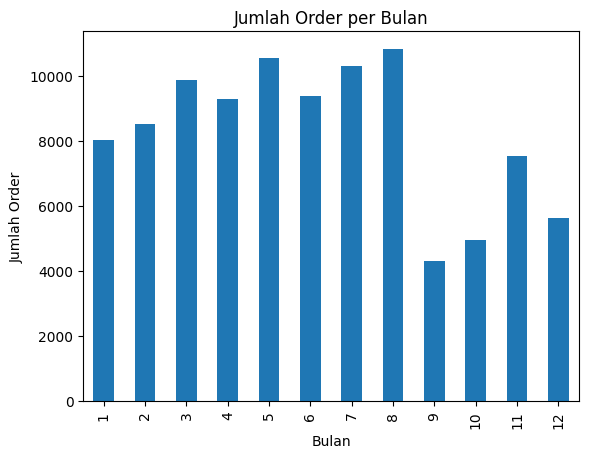

In [79]:
orders_reviews['order_purchase_timestamp'] = pd.to_datetime(orders_reviews['order_purchase_timestamp'])
monthly_counts = orders_reviews['order_purchase_timestamp'].dt.month.value_counts().sort_index()
monthly_counts.plot(kind='bar')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Order')
plt.title('Jumlah Order per Bulan')
plt.show()

### Explore `products_df` dan `product_category_df`

In [ ]:
products_df.sample(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
13246,be5353e2c543ba4f67831f95d3775420,beleza_saude,58.0,1121.0,3.0,150.0,43.0,11.0,18.0
8899,7ca936dc950df6505bbba4a54a00203d,beleza_saude,41.0,1211.0,3.0,875.0,30.0,26.0,28.0
27816,8a83947ee16d41d5e83dd90b7d28caee,esporte_lazer,57.0,376.0,5.0,700.0,60.0,8.0,17.0


In [81]:
product_category_df.sample(3)

,product_category_name,product_category_name_english
4,moveis_decoracao,furniture_decor
42,moveis_sala,furniture_living_room
9,relogios_presentes,watches_gifts


In [82]:
products_df = products_df.merge(product_category_df,
                                    left_on="product_category_name",
                                    right_on="product_category_name",
                                    how='inner')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [83]:
products_df.groupby(by=["product_category_name"]).agg({
    "product_weight_g": "mean",
    "product_length_cm": "mean",
    "product_height_cm": "mean",
    "product_width_cm": "mean"
})

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_category_name,,,,
agro_industria_e_comercio,5263.405405,36.527027,28.945946,25.810811
alimentos,923.414634,21.292683,14.682927,17.719512
alimentos_bebidas,1307.932692,23.403846,15.951923,18.394231
artes,1691.763636,35.927273,11.800000,23.363636
artes_e_artesanato,1164.578947,28.368421,9.789474,21.052632
...,...,...,...,...
sinalizacao_e_seguranca,2969.817204,30.505376,23.892473,20.817204
tablets_impressao_imagem,381.444444,28.111111,9.444444,21.555556
telefonia,236.506173,18.432981,6.853616,13.248677


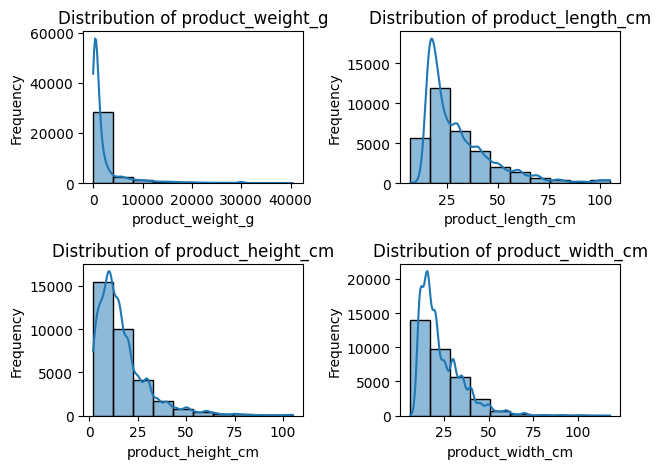

In [84]:
for i, column in enumerate(['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(products_df[column], bins=10, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Explore all data

In [85]:
merged_1 = orders_reviews.merge(items_payments_df,
                                    left_on="order_id",
                                    right_on="order_id",
                                    how='inner')
merged_1.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,voucher,1,18.59


In [86]:
merged_2 = merged_1.merge(products_df,
                                    left_on="product_id",
                                    right_on="product_id",
                                    how='inner')
merged_2.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares


In [87]:
all_df=merged_2.merge(customers_seller_df,
                                    left_on="customer_id",
                                    right_on="customer_id",
                                    how='inner')
all_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,seller_id_y,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,sao paulo,SP,3149,-23.577482,-46.587077,sao paulo,SP,none,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,sao paulo,SP,3149,-23.577482,-46.587077,sao paulo,SP,none,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,sao paulo,SP,3149,-23.577482,-46.587077,sao paulo,SP,none,sao paulo,SP


In [88]:
all_df.groupby(by=["review_score"]).agg({
    "customer_id": "nunique",
    "price": "mean"
})

,customer_id,price
review_score,,
1,8766,97.493365
2,2499,89.978831
3,6675,92.892905
4,15754,97.012112
5,48316,97.331544


In [89]:
all_df.groupby(by=["payment_type"]).agg({
    "customer_id": "nunique",
    "price": "sum",
    "freight_value": "sum",
    "payment_value": "sum"
})

,customer_id,price,freight_value,payment_value
payment_type,,,,
boleto,16151,2018996.88,382046.700,3.120955e+06
credit_card,63115,8704583.44,1448338.655,1.226870e+07
debit_card,1288,147805.62,26816.585,2.100550e+05
voucher,3094,557484.56,106483.405,3.748480e+05


In [90]:
all_df.groupby(by=["order_status"]).agg({
    "customer_id": "nunique",
    "freight_value": "mean",
    "payment_value": "mean"
})

,customer_id,freight_value,payment_value
order_status,,,
approved,2,10.680000,85.188000
canceled,398,16.060265,148.590182
delivered,80153,16.600607,134.848108
invoiced,263,16.662920,165.488237
processing,242,18.118688,173.065380
shipped,779,17.474517,134.072523
unavailable,5,18.658333,196.426458


In [91]:
all_df.groupby(by=["customer_state"]).agg({
    "customer_id": "nunique",
    "price": "sum",
    "freight_value": "sum",
    "payment_value": "sum"
})

,customer_id,price,freight_value,payment_value
customer_state,,,,
AL,1,92.90,33.255,1.509800e+02
BA,540,72336.42,14930.375,9.989931e+04
DF,1947,228659.15,43804.875,3.239709e+05
ES,1992,228877.19,45531.775,3.197197e+05
GO,1892,243673.05,47011.525,3.455907e+05
MG,11450,1623248.23,306017.175,2.272492e+06
MS,603,73755.69,14220.555,1.078131e+05
MT,174,23536.87,4783.545,3.426582e+04
PA,4,483.22,121.365,6.465600e+02


**Insight:**
- Customer memberikan score terbanyak (nilai 5) dengan jumlah 48316 
- Urutan payment type yang paling banyak digunakan yaitu credit card, baleto, voucher, dan debit card
- Terdapat 80153 kali pengiriman dengan status "delivered" dan 398 kali pengiriman dengan status "canceled"
- Pelanggan terbanyak dari negara bagian SP dan pelanggan terkecil dari negara bagian AC

In [92]:
# Mengonversi kolom ke dalam list
print(list(all_df.columns))


['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'order_item_id', 'product_id', 'seller_id_x', 'shipping_limit_date', 'price', 'freight_value', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name_english', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state', 'seller_id_y', 'seller_city', 'seller_state']


In [93]:
all_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,seller_id_y,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,sao paulo,SP,3149,-23.577482,-46.587077,sao paulo,SP,none,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,sao paulo,SP,3149,-23.577482,-46.587077,sao paulo,SP,none,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,sao paulo,SP,3149,-23.577482,-46.587077,sao paulo,SP,none,sao paulo,SP
3,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,...,vianopolis,GO,75265,-16.745150,-48.514783,vianopolis,GO,none,vianopolis,GO
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5,...,santo andre,SP,9195,-23.676257,-46.514580,santo andre,SP,none,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118216,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,29bb71b2760d0f876dfa178a76bc4734,4,...,praia grande,SP,11722,-24.001334,-46.450022,praia grande,SP,none,praia grande,SP
118217,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,371579771219f6db2d830d50805977bb,5,...,nova vicosa,BA,45920,-17.898045,-39.373106,nova vicosa,BA,none,nova vicosa,BA
118218,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,8ab6855b9fe9b812cd03a480a25058a1,2,...,japuiba,RJ,28685,-22.563909,-42.695343,japuiba,RJ,none,japuiba,RJ
118219,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,8ab6855b9fe9b812cd03a480a25058a1,2,...,japuiba,RJ,28685,-22.563909,-42.695343,japuiba,RJ,none,japuiba,RJ


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola pembelian pelanggan setiap bulannya?

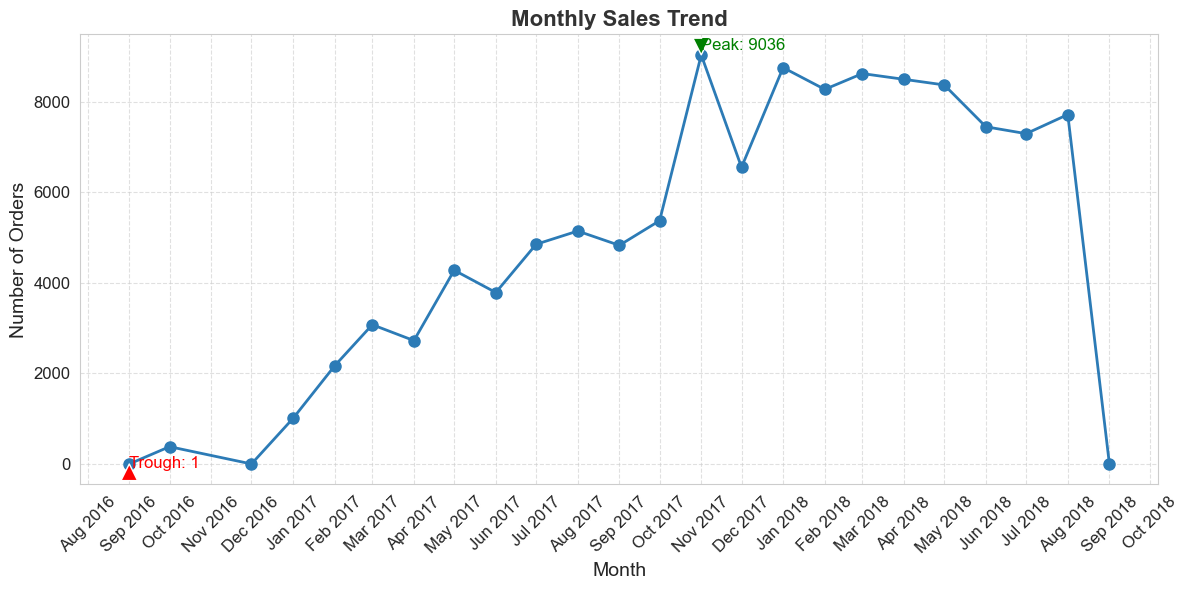

In [94]:
import matplotlib.dates as mdates

all_df['month'] = all_df['order_purchase_timestamp'].dt.to_period('M')
monthly_sales = all_df.groupby('month')['order_id'].count()

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.to_timestamp(), monthly_sales, marker='o', color='#2C7BB6', linewidth=2, markersize=8)
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)

# Mengatur format sumbu X agar lebih informatif (bulan dan tahun)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Mengatur jarak label pada sumbu X agar tidak bertumpuk
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Menampilkan setiap bulan

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

max_sales = monthly_sales.max()
min_sales = monthly_sales.min()

# Menambahkan label pada max dan min
plt.annotate(f'Peak: {max_sales}', xy=(monthly_sales.idxmax().to_timestamp(), max_sales), 
            xytext=(monthly_sales.idxmax().to_timestamp(), max_sales + 100),
            arrowprops=dict(facecolor='green', shrink=0.05), fontsize=12, color='green')

plt.annotate(f'Trough: {min_sales}', xy=(monthly_sales.idxmin().to_timestamp(), min_sales), 
            xytext=(monthly_sales.idxmin().to_timestamp(), min_sales - 100),
            arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='red')

# Menampilkan plot
plt.tight_layout()
plt.show()


### Pertanyaan 2: Apa produk yang memiliki jumlah penjualan dan total pendapatan tertinggi?

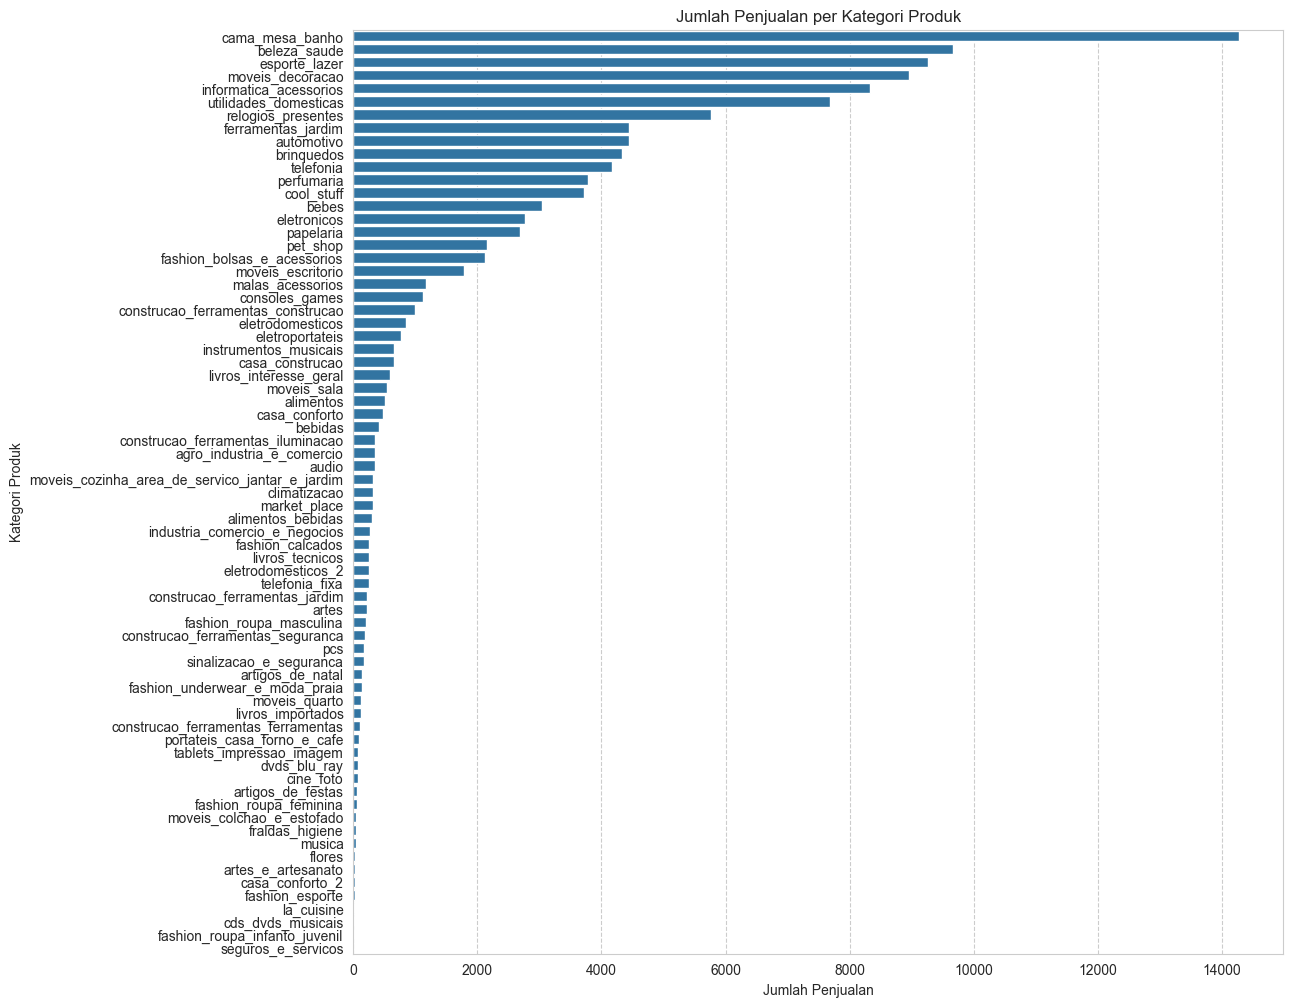

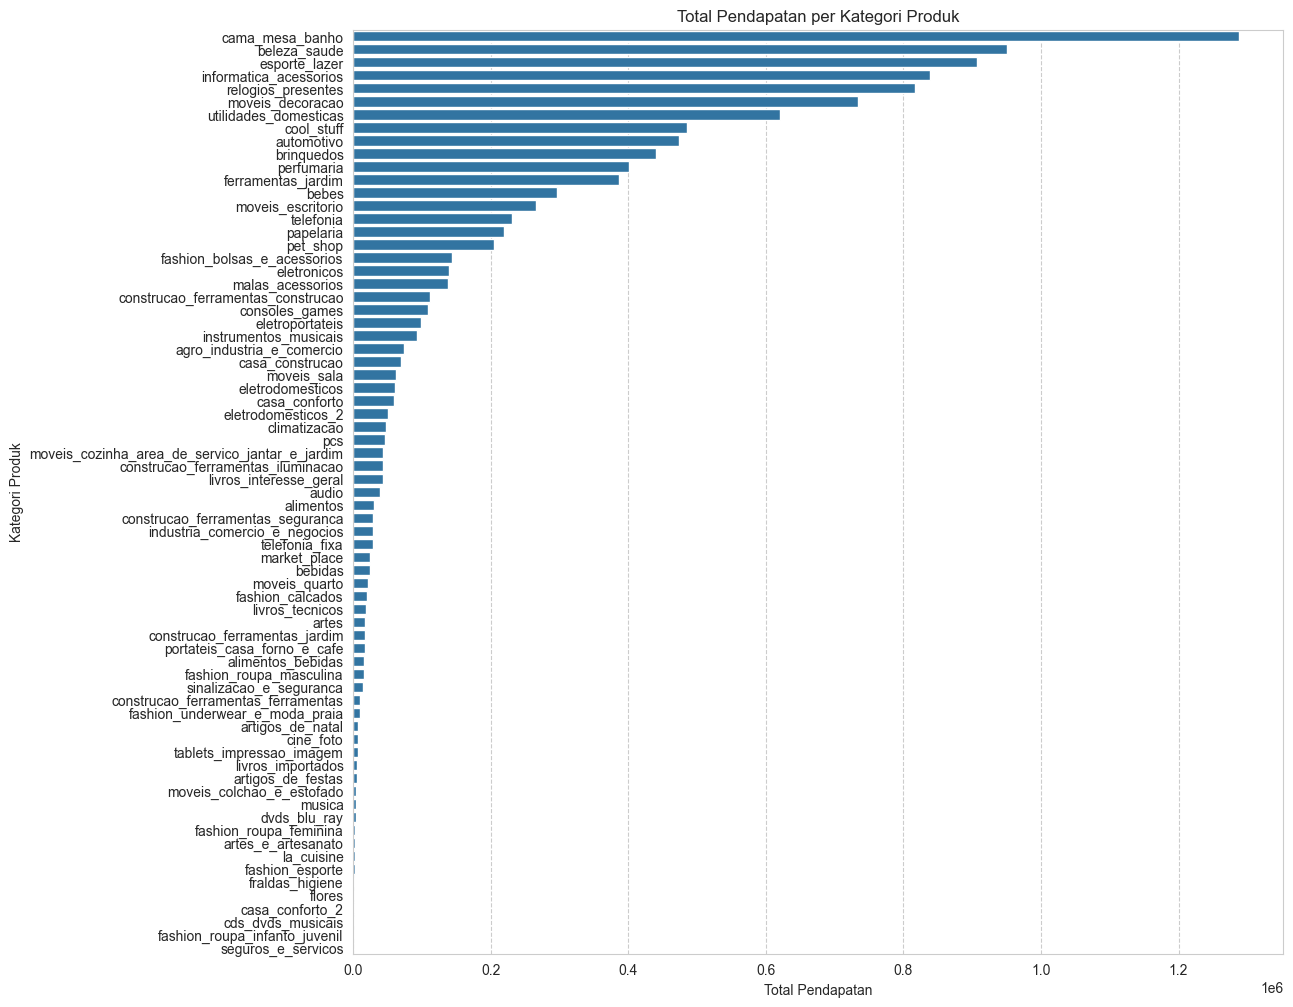

In [95]:
category_sales = all_df.groupby('product_category_name').agg({'order_id': 'count', 'price': 'sum'}).reset_index()
category_sales.columns = ['Kategori Produk', 'Jumlah Penjualan', 'Total Pendapatan']

plt.figure(figsize=(12, 12))
sns.barplot(x='Jumlah Penjualan', y='Kategori Produk', data=category_sales.sort_values('Jumlah Penjualan', ascending=False))
plt.title('Jumlah Penjualan per Kategori Produk')
plt.grid(axis='x', linestyle='--', alpha=1)
plt.show()

plt.figure(figsize=(12, 12))
sns.barplot(x='Total Pendapatan', y='Kategori Produk', data=category_sales.sort_values('Total Pendapatan', ascending=False))
plt.title('Total Pendapatan per Kategori Produk')
plt.grid(axis='x', linestyle='--', alpha=1)
plt.show()


### Pertanyaan 3: RFM Analysis
- Daftar pelanggan yang baru melakukan pembelian
- Daftar pelanggan dengan jumlah barang yang dibeli paling banyak 
- Daftar pelanggan dengan nominal yang dibelanjakan paling banyak
- Distribusi pelanggan tiap segment

In [96]:
# Tanggal snapshot sebagai referensi untuk menghitung recency
snapshot_date = all_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# Menghitung RFM
rfm = all_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'price': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,293,1,89.80
1,000161a058600d5901f007fab4c27140,414,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,552,1,179.99
3,0002414f95344307404f0ace7a26f1d5,383,1,149.90
4,000379cdec625522490c315e70c7a9fb,154,1,93.00


In [97]:
# Menampilkan top 5 berdasarkan Recency
top_recency = rfm.nsmallest(7, 'Recency')
print("Top 5 Customers by Recency:")
print(top_recency)

# Menampilkan top 5 berdasarkan Frequency
top_frequency = rfm.nlargest(5, 'Frequency')
print("\nTop 5 Customers by Frequency:")
print(top_frequency)

# Menampilkan top 5 berdasarkan Monetary
top_monetary = rfm.nlargest(5, 'Monetary')
print("\nTop 5 Customers by Monetary:")
print(top_monetary)

Top 5 Customers by Recency:
                            customer_id  Recency  Frequency  Monetary
24202  4b7decb9b58e2569548b8b4c8e20e8d7        1          1    145.00
5316   10a79ef2783cae3d8d678e85fde235ac        5          1      6.90
23525  496630b6740bcca28fce9ba50d8a26ef        5          3     74.70
26936  54365416b7ef5599f54a6c7821d5d290        5          1     99.00
27711  56b1ac2855cc6d7950b4ffa6a9b41b0d        5          2    219.80
35115  6e353700bc7bcdf6ebc15d6de16d7002        5          1     45.90
43879  898b7fee99c4e42170ab69ba59be0a8b        5          1     84.99

Top 5 Customers by Frequency:
                            customer_id  Recency  Frequency  Monetary
31844  63b964e79dee32a3587651701a2b8dbf      201        120  33288.00
51693  a193aa8d905b8e2460a1f49e26caa4a9      203        108   1078.92
18435  395ce4e9b5ad9165113d5321fcb7a864       89         98  12240.20
19929  3e13d7562141418f00f431202390536c      397         98  17924.20
61012  be1b70680b9f9694d8c70f41

C:\Users\ACER NITRO 5\AppData\Local\Temp\ipykernel_8100\2051070103.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Recency", x="customer_id", data=rfm.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\ACER NITRO 5\AppData\Local\Temp\ipykernel_8100\2051070103.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Frequency", x="customer_id", data=rfm.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\ACER NITRO 5\AppData\Local\Temp\ipykernel_8100\2051070103.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `l

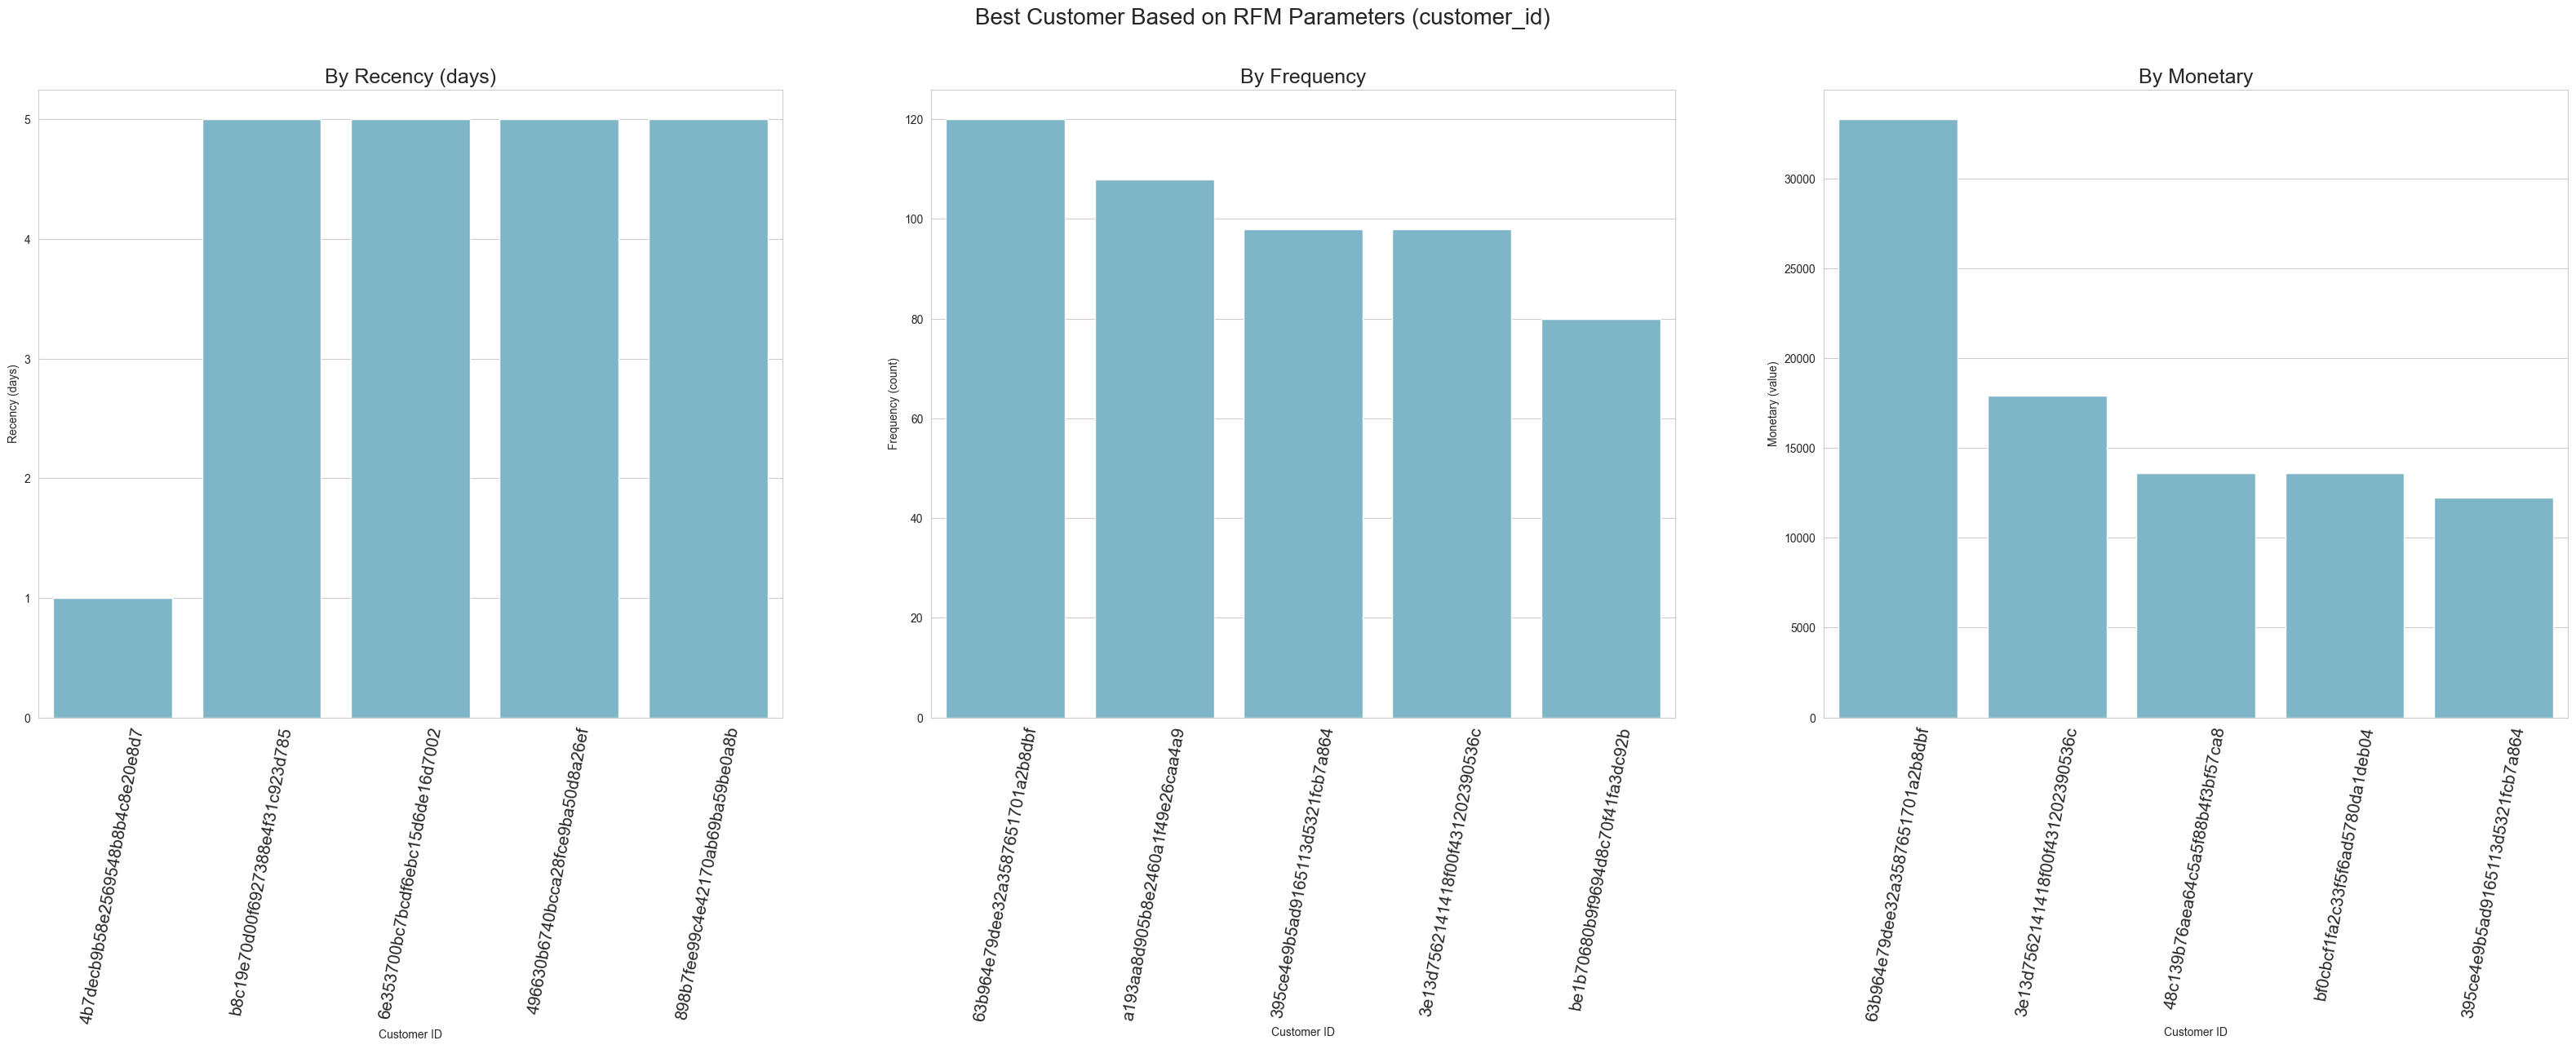

In [98]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(40, 10))
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="Recency", x="customer_id", data=rfm.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_xlabel('Customer ID')
ax[0].set_ylabel('Recency (days)')
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15, rotation=80)

sns.barplot(y="Frequency", x="customer_id", data=rfm.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_xlabel('Customer ID')
ax[1].set_ylabel('Frequency (count)')
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=80)

sns.barplot(y="Monetary", x="customer_id", data=rfm.sort_values(by="Monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_xlabel('Customer ID')
ax[2].set_ylabel('Monetary (value)')
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=80)


plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)

plt.show()

#### Mengurutkan customer berdasarkan recency, frequency, & monetary score

In [99]:
rfm['r_rank'] = rfm['Recency'].rank(ascending=False)
rfm['f_rank'] = rfm['Frequency'].rank(ascending=True)
rfm['m_rank'] = rfm['Monetary'].rank(ascending=True)

rfm.head()

,customer_id,Recency,Frequency,Monetary,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,293,1,89.80,27571.0,31766.0,39021.5
1,000161a058600d5901f007fab4c27140,414,1,54.90,13530.5,31766.0,23944.0
2,0001fd6190edaaf884bcaf3d49edf079,552,1,179.99,2287.0,31766.0,63064.0
3,0002414f95344307404f0ace7a26f1d5,383,1,149.90,17026.0,31766.0,57624.0
4,000379cdec625522490c315e70c7a9fb,154,1,93.00,54519.5,31766.0,40916.0


In [100]:
# normalizing the rank of the customers
rfm['r_rank_norm'] = (rfm['r_rank']/rfm['r_rank'].max())*100
rfm['f_rank_norm'] = (rfm['f_rank']/rfm['f_rank'].max())*100
rfm['m_rank_norm'] = (rfm['m_rank']/rfm['m_rank'].max())*100

rfm.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm.head()

,customer_id,Recency,Frequency,Monetary,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,293,1,89.80,33.688082,38.813812,47.679065
1,000161a058600d5901f007fab4c27140,414,1,54.90,16.532465,38.813812,29.256372
2,0001fd6190edaaf884bcaf3d49edf079,552,1,179.99,2.794409,38.813812,77.055790
3,0002414f95344307404f0ace7a26f1d5,383,1,149.90,20.803499,38.813812,70.408837
4,000379cdec625522490c315e70c7a9fb,154,1,93.00,66.615552,38.813812,49.993891


In [101]:
rfm['RFM_score'] = 0.15*rfm['r_rank_norm']+0.28 * \
    rfm['f_rank_norm']+0.57*rfm['m_rank_norm']
rfm['RFM_score'] *= 0.05
rfm = rfm.round(2)
rfm[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,2.15
1,000161a058600d5901f007fab4c27140,1.50
2,0001fd6190edaaf884bcaf3d49edf079,2.76
3,0002414f95344307404f0ace7a26f1d5,2.71
4,000379cdec625522490c315e70c7a9fb,2.47
5,0004164d20a9e969af783496f3408652,3.55
6,000419c5494106c306a97b5635748086,1.42


#### Segmentasi customer berdasarkan RFM_score

In [102]:
rfm["customer_segment"] = np.where(
    rfm['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm['RFM_score'] > 4, "High value customer",(np.where(
            rfm['RFM_score'] > 3, "Medium value customer", np.where(
                rfm['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,2.15,Low value customers
1,000161a058600d5901f007fab4c27140,1.50,lost customers
2,0001fd6190edaaf884bcaf3d49edf079,2.76,Low value customers
3,0002414f95344307404f0ace7a26f1d5,2.71,Low value customers
4,000379cdec625522490c315e70c7a9fb,2.47,Low value customers
5,0004164d20a9e969af783496f3408652,3.55,Medium value customer
6,000419c5494106c306a97b5635748086,1.42,lost customers
7,00046a560d407e99b969756e0b10f282,2.65,Low value customers
8,00050bf6e01e69d5c0fd612f1bcfb69c,1.86,Low value customers
9,000598caf2ef4117407665ac33275130,3.83,Medium value customer


In [103]:
customer_segment_df = rfm.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,4872
1,Low value customers,37479
2,Medium value customer,19200
3,Top customers,2112
4,lost customers,18179


In [104]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

C:\Users\ACER NITRO 5\AppData\Local\Temp\ipykernel_8100\3337458589.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


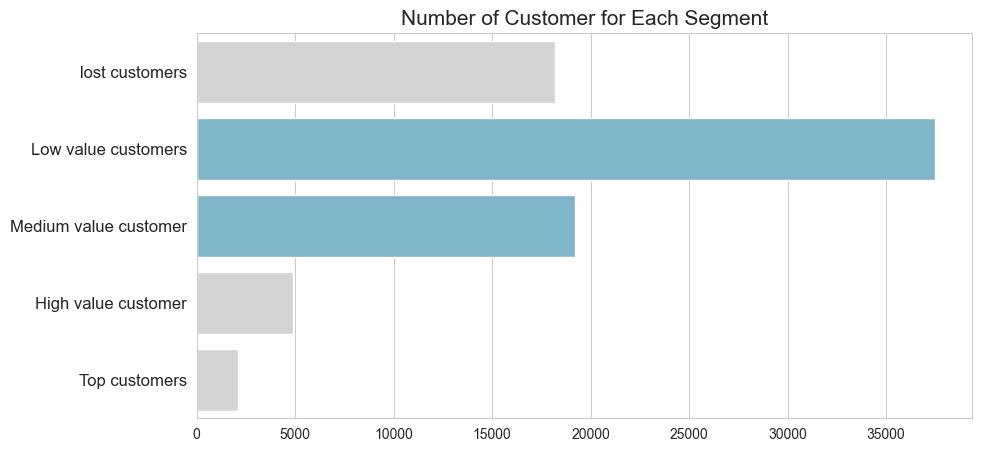

In [105]:
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 4: Bagaimana distribusi pembelian 
- Kota dengan pembelian terbanyak
- Negara dengan pembelian terbanyak
- Urutan jenis payment yang paling banyak digunakan
- Distribusi kategori berdasarkan jenis payment

C:\Users\ACER NITRO 5\AppData\Local\Temp\ipykernel_8100\2839506099.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=statewise.values, y=statewise.index, palette='viridis')


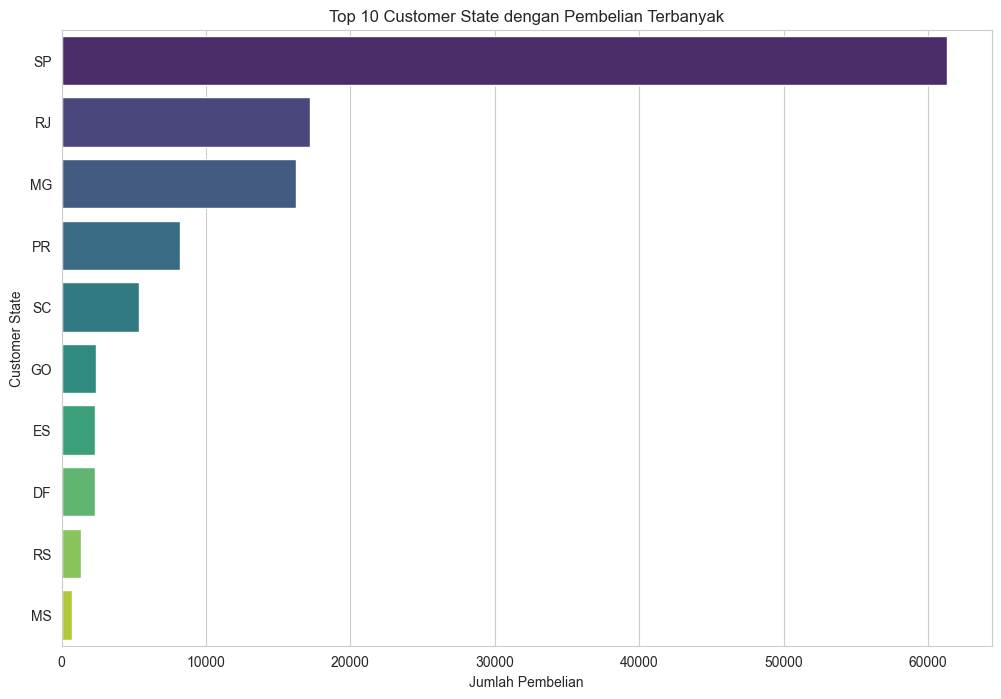

C:\Users\ACER NITRO 5\AppData\Local\Temp\ipykernel_8100\2839506099.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=citywise.values, y=citywise.index, palette='coolwarm')


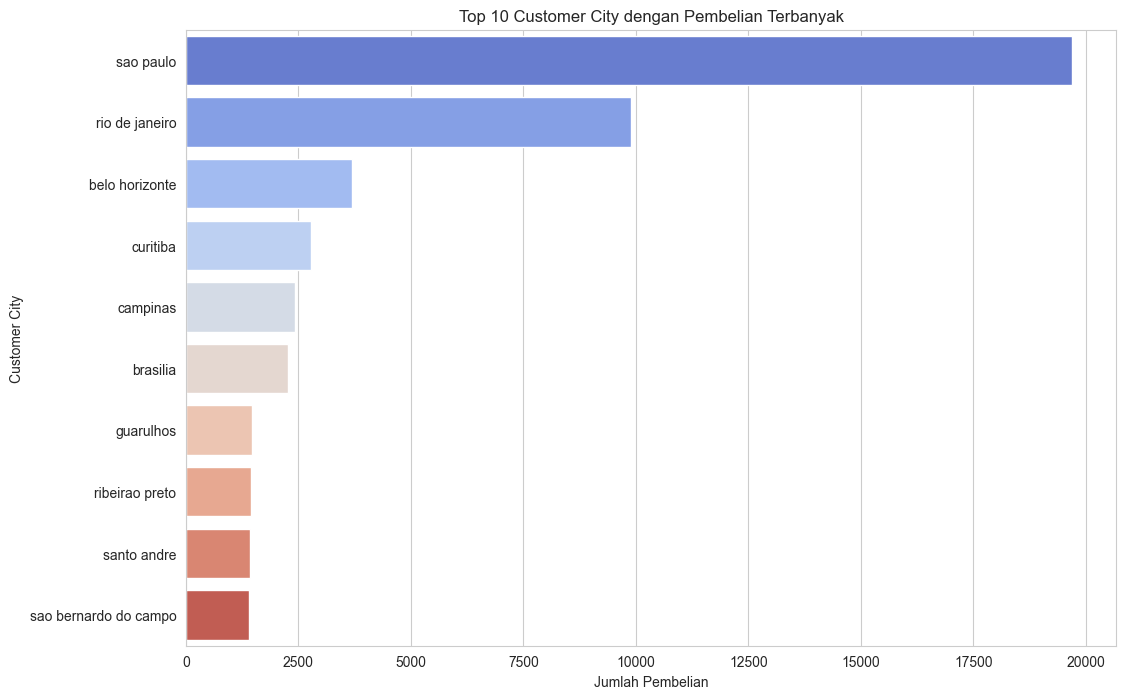

C:\Users\ACER NITRO 5\AppData\Local\Temp\ipykernel_8100\2839506099.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=paymentwise.index, y=paymentwise.values, palette='magma')


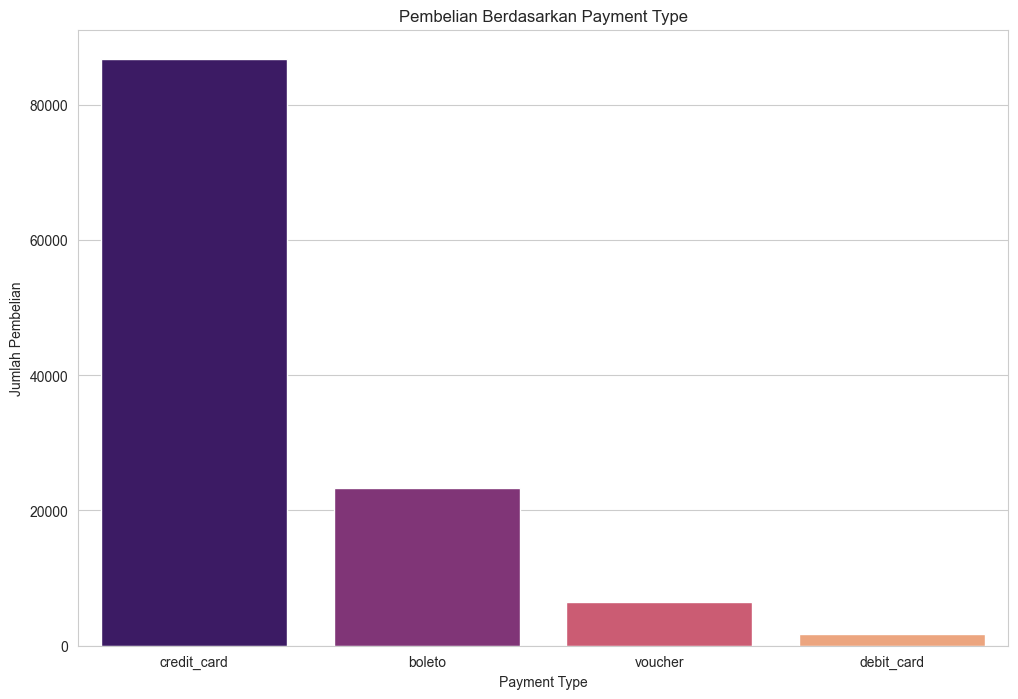

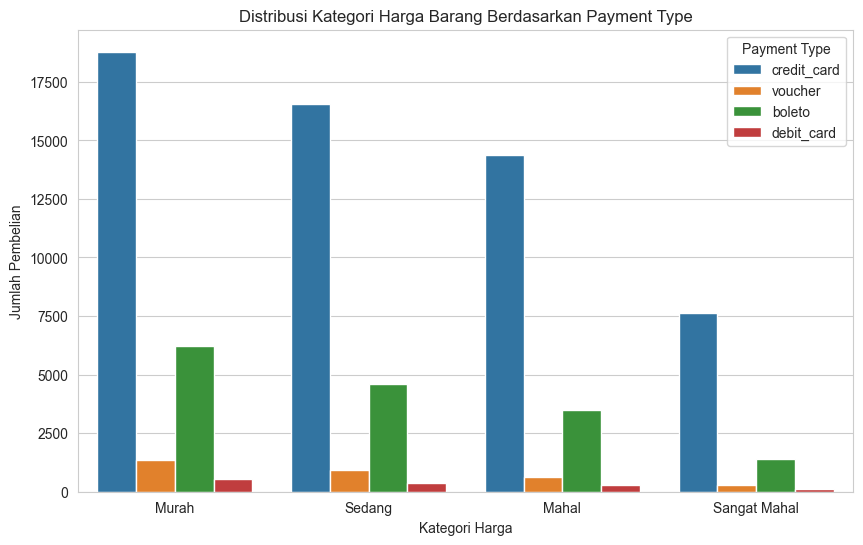

In [106]:
# Menghitung frekuensi pembelian untuk setiap produk
product_purchase = all_df.groupby(['product_id', 'customer_state', 'customer_city', 'payment_type']).agg({
    'order_item_id': 'count',
    'price': 'mean'
}).rename(columns={'order_item_id': 'purchase_count', 'price': 'average_price'}).reset_index()

# Mengelompokkan berdasarkan rentang harga (Binning)
bins_price = [0, 50, 100, 200, float('inf')]
labels_price = ['Murah', 'Sedang', 'Mahal', 'Sangat Mahal']
product_purchase['price_category'] = pd.cut(product_purchase['average_price'], bins=bins_price, labels=labels_price)

# Visualisasi 1: Barang dengan Pembelian Terbanyak berdasarkan State
plt.figure(figsize=(12, 8))
statewise = product_purchase.groupby('customer_state')['purchase_count'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=statewise.values, y=statewise.index, palette='viridis')
plt.title('Top 10 Customer State dengan Pembelian Terbanyak')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Customer State')
plt.show()

# Visualisasi 2: Barang dengan Pembelian Terbanyak berdasarkan City
plt.figure(figsize=(12, 8))
citywise = product_purchase.groupby('customer_city')['purchase_count'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=citywise.values, y=citywise.index, palette='coolwarm')
plt.title('Top 10 Customer City dengan Pembelian Terbanyak')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Customer City')
plt.show()

# Visualisasi 3: Barang dengan Pembelian Terbanyak berdasarkan Payment Type
plt.figure(figsize=(12, 8))
paymentwise = product_purchase.groupby('payment_type')['purchase_count'].sum().sort_values(ascending=False)
sns.barplot(x=paymentwise.index, y=paymentwise.values, palette='magma')
plt.title('Pembelian Berdasarkan Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Jumlah Pembelian')
plt.show()

# Visualisasi 4: Distribusi Kategori Harga (Binning) Berdasarkan Payment Type
plt.figure(figsize=(10, 6))
sns.countplot(data=product_purchase, x='price_category', hue='payment_type')
plt.title('Distribusi Kategori Harga Barang Berdasarkan Payment Type')
plt.xlabel('Kategori Harga')
plt.ylabel('Jumlah Pembelian')
plt.legend(title='Payment Type')
plt.show()

### Pertanyaan 5: Bagaimana persebaran Geospatial Anlysis

In [107]:
import geopandas as gpd
import folium

In [108]:
selected_columns=["customer_id", "customer_city", "customer_state", "geolocation_lat",	"geolocation_lng", "price"]

# Konversi menjadi GeoDataFrame
gdf = gpd.GeoDataFrame(
    all_df[selected_columns], 
    geometry=gpd.points_from_xy(all_df['geolocation_lng'], all_df['geolocation_lat']), crs="EPSG:4326"
)

gdf.head()

,customer_id,customer_city,customer_state,geolocation_lat,geolocation_lng,price,geometry
0,9ef432eb6251297304e76186b10a928d,sao paulo,SP,-23.577482,-46.587077,29.99,POINT (-46.58708 -23.57748)
1,9ef432eb6251297304e76186b10a928d,sao paulo,SP,-23.577482,-46.587077,29.99,POINT (-46.58708 -23.57748)
2,9ef432eb6251297304e76186b10a928d,sao paulo,SP,-23.577482,-46.587077,29.99,POINT (-46.58708 -23.57748)
3,41ce2a54c0b03bf3443c3d931a367089,vianopolis,GO,-16.745150,-48.514783,159.90,POINT (-48.51478 -16.74515)
4,8ab97904e6daea8866dbdbc4fb7aad2c,santo andre,SP,-23.676257,-46.514580,19.90,POINT (-46.51458 -23.67626)


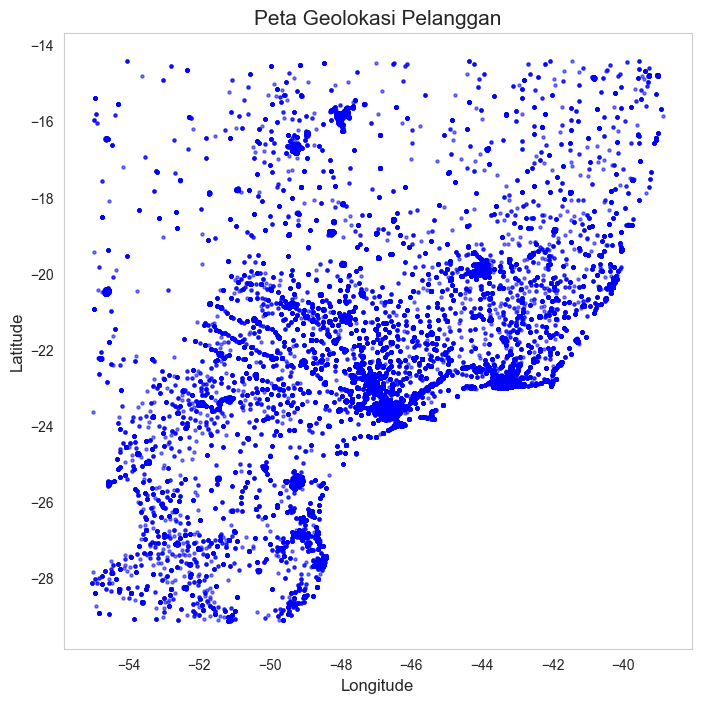

In [109]:
# Buat visualisasi peta dengan titik-titik pelanggan
fig, ax = plt.subplots(figsize=(12, 8))

# Mengatur batas sumbu untuk peta
gdf.plot(ax=ax, marker='o', color='blue', markersize=5, alpha=0.5)

# Menambahkan judul dan label
plt.title('Peta Geolokasi Pelanggan', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Tampilkan peta
plt.grid()
plt.show()

In [110]:
# # Membuat peta dengan titik tengah
# m = folium.Map(location=[gdf['geolocation_lat'].mean(), gdf['geolocation_lng'].mean()], zoom_start=10)

# # Menambahkan titik ke peta
# for idx, row in gdf.iterrows():
#     folium.CircleMarker(
#         location=(row['geolocation_lat'], row['geolocation_lng']),
#         radius=5,
#         popup=f"Customer ID: {row['customer_id']}, Price: ${row['price']:.2f}",
#         color='blue',
#         fill=True,
#         fill_color='blue',
#         fill_opacity=0.6
#     ).add_to(m)

# # Menyimpan peta
# # m.save('customer_locations_map.html')    
# m

## Conclusion

### Pertanyaan 1: Bagaimana pola pembelian pelanggan setiap bulannya? 
- Penjualan paling sedikit terjadi pada bulan Agustus 2016 sebesar 1 pelanggan
- Penjualan paling banyak terjadi pada bulan November 2017 sebesar 9036 pelanggan



### Pertanyaan 2: Apa produk yang memiliki jumlah penjualan dan total pendapatan tertinggi?
- 5 produk dengan jumlah penjualan tertinggi yaitu: cama_mesa_banho, beleza_saude, esporte_lazer, movies_decoracao, informatica_acessorior
- 5 produk dengan jumlah pendapatan tertinggi yaitu: cama_mesa_banho, beleza_saude, esporte_lazer, informatica_acessorior, dan relogios_presentes


### Pertanyaan 3: RFM Analysis
- Daftar pelanggan yang baru melakukan pembelian:
    - 4b7decb9b58e2569548b8b4c8e20e8d7        
    - b8c19e70d00f6927388e4f31c923d785                
    - 6e353700bc7bcdf6ebc15d6de16d7002                
    - 496630b6740bcca28fce9ba50d8a26ef         
    - 898b7fee99c4e42170ab69ba59be0a8b
- Daftar pelanggan dengan jumlah barang yang dibeli paling banyak:
    - 63b964e79dee32a3587651701a2b8dbf      
    - a193aa8d905b8e2460a1f49e26caa4a9      
    - 395ce4e9b5ad9165113d5321fcb7a864       
    - 3e13d7562141418f00f431202390536c      
    - be1b70680b9f9694d8c70f41fa3dc92b 
- Daftar pelanggan dengan nominal yang dibelanjakan paling banyak:
    - 63b964e79dee32a3587651701a2b8dbf      
    - 3e13d7562141418f00f431202390536c      
    - 48c139b76aea64c5a5f88b4f3bf57ca8      
    - bf0cbcf1fa2c33f5f6ad5780da1deb04       
    - 395ce4e9b5ad9165113d5321fcb7a864  

- Distribusi pelanggan tiap segment <br>
    Sebagian besar pelanggan berada di kategori nilai rendah dan menengah, sedangkan segmen pelanggan bernilai tinggi dan pelanggan terbaik hanya mewakili sebagian kecil dari total basis pelanggan

### Pertanyaan 4: Bagaimana distribusi pembelian 
- Kota dengan pembelian terbanyak: SP, RJ, dan MG
- Negara dengan pembelian terbanyak: sao paulo, rio de Janeiro, belo horizonte
- Urutan jenis payment yang paling banyak digunakan: Credit Card, Boleto, Voucher, dan Debot Card
- Distribusi kategori berdasarkan jenis payment: Credit Card masih paling banyak digunakan dari berbagai rentang harga (murah, sedang, mahal, sangat mahal)

### Pertanyaan 5: Bagaimana persebaran Geospatial Anlysis
- Pelanggan tersebar di seluruh area dengan longitude antara sekitar -54 hingga -40 dan latitude dari -28 hingga -14. 
- Pada area sekitar longitude -48 menunjukkan bahwa di wilayah ini terdapat lebih banyak pelanggan dibandingkan area lainnya.



## Convert `all_df` to csv

In [111]:
all_df.to_csv("dashboard/main_data.csv", index=False)